<a href="https://colab.research.google.com/github/juramirezmon/Senales_y_sistemas/blob/main/Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Solución Parcial 1

1. Se tiene un microprocesador de 5 bits con entrada análoga de -3.3 a 5 [v]. Diseñe el sistema de acondicionamiento y digitalización para la señal: x(t) = 20 sin(7t−π/2) − 3 cos(5t) + 2 cos(10t).

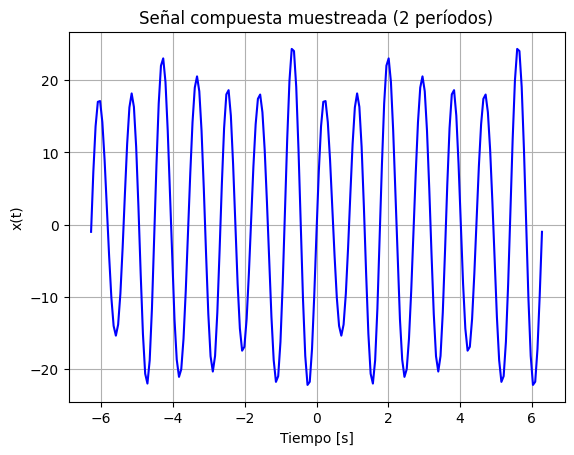

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Período fundamental de la señal compuesta
T_0 = 2*np.pi # Periodo fundamental o total

# Amplitudes
A_1 = 20
A_2 = 3
A_3 = 2

# Frecuencias angulares
w1 = 7     # rad/s
w2 = 5     # rad/s
w3 = 10    # rad/s

# Tiempo de simulación (2 períodos fundamentales)
ti = -T_0
tf = T_0

# Frecuencia de muestreo: al menos el doble de la máxima frecuencia (Nyquist)
f_max = w3 / (2 * np.pi)  # frecuencia en Hz
Fs = 10 * f_max           # muestreo 10 veces mayor para buena visualización
Ts = 1 / Fs

# Vector de tiempo
tv = np.arange(ti, tf, Ts)

# Construimos la señal
xv = A_1 * np.sin(w1 * tv) - A_2 * np.cos(w2 * tv) + A_3 * np.cos(w3 * tv)

# Graficamos la señal continua
plt.plot(tv, xv, 'b')
plt.xlabel('Tiempo [s]')
plt.ylabel('x(t)')
plt.title('Señal compuesta muestreada (2 períodos)')
plt.grid(True)
plt.show()

<ipython-input-8-49a161224e4e>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yq[i] = my_cuantizador(ycs[i], ve)


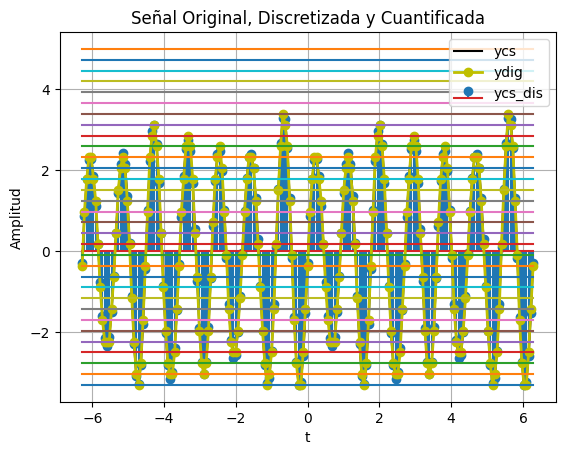

In [ ]:
# Definimos la función my_ceropen (cero y pendiente)
def my_ceropen(x, ymin=0, ymax=200):
  xmax = max(x)
  xmin = min(x)
  m = (ymax - ymin) / (xmax - xmin)
  c = ymin - m * xmin
  yv = m * x + c
  return yv

# Redefinimos "y" como se definió en la parte anterior
y = 20 * np.sin(7 * tv) - 3 * np.cos(5 * tv) + 2 * np.cos(10 * tv)

  #cero y pendiente
ycs = my_ceropen(y, ymin=-3.3,ymax=3.3)


#número de bits y vector de cuantización
nbits = 5
rmin = -3.3
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax
from scipy.spatial.distance import cdist


# Función de cuantización
def my_cuantizador(yn, vq):
  dn = cdist(np.array(yn).reshape(-1, 1), vq.reshape(-1, 1))
  ind = np.argmin(dn, axis=1)
  return vq[ind]

# Cuantizamos la señal
yq = np.zeros_like(ycs)
for i in range(len(ycs)):
  yq[i] = my_cuantizador(ycs[i], ve)

# Graficamos
plt.plot(tv, ycs, c='black', label='ycs') # Señal original
plt.stem(tv, ycs, label='ycs_dis') # Señal discretizada
plt.plot(tv, yq, c='y', marker='o', label='ydig', linewidth=2)  # Señal cuantificada
# Mostramos niveles de cuantificación
for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.title('Señal Original, Discretizada y Cuantificada')
plt.show()

2. Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital con frecuencia de muestreo de 5kHz, aplicado a la señal x(t) = 3 cos(1000πt) + 5 sin(2000πt) + 10 cos(11000πt)?.

Ω1 = 0.63 rad/muestra
Ω2 = 1.26 rad/muestra
Ω3 antes de aliasing = 6.91 rad/muestra
Ω3 después de aliasing = 0.63 rad/muestra


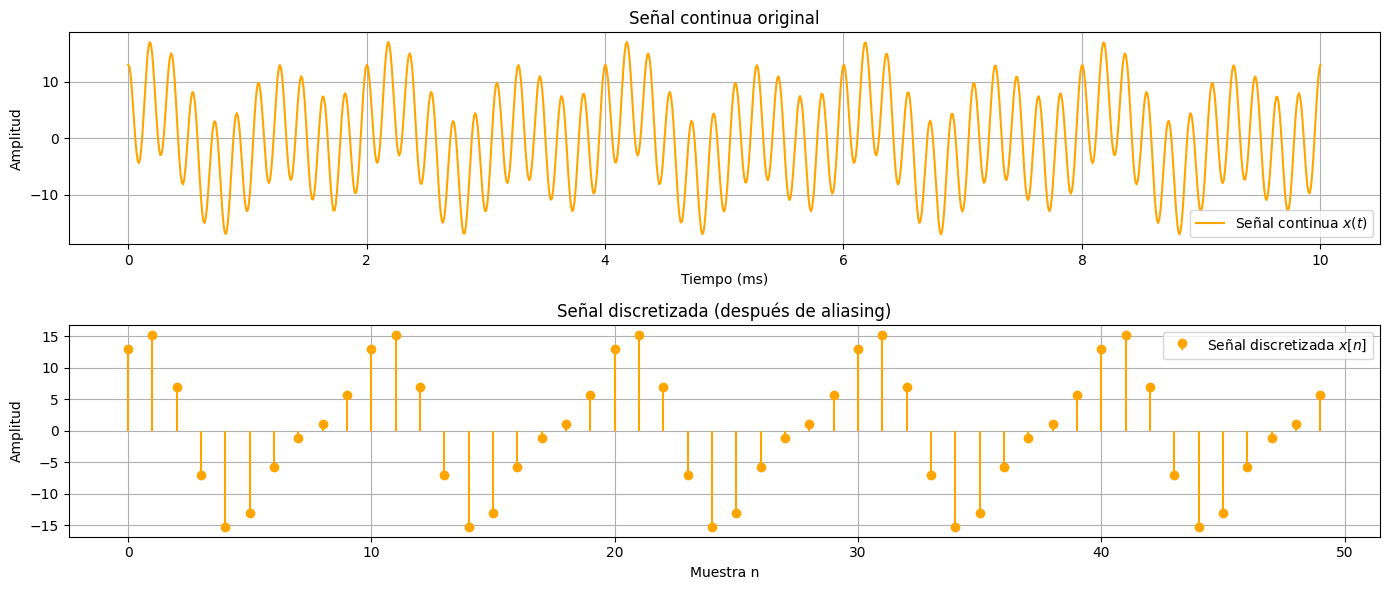

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
Fs = 5000  # Frecuencia de muestreo (Hz)
t = np.linspace(0, 0.01, 1000)  # Tiempo continuo (10 ms)

# Frecuencias angulares continuas
w1 = 1000 * np.pi
w2 = 2000 * np.pi
w3 = 11000 * np.pi

# Señal continua
x_t = 3 * np.cos(w1 * t) + 5 * np.sin(w2 * t) + 10 * np.cos(w3 * t)

# Señal discretizada
N = 50  # Número de muestras
n = np.arange(N)

# Frecuencias angulares normalizadas (Omega = w / Fs)
Omega1 = w1 / Fs
Omega2 = w2 / Fs
Omega3 = w3 / Fs

# Aliasing: llevar Omega3 al intervalo [-pi, pi]
if Omega3 > np.pi:
    Omega3_alias = Omega3 - 2*np.pi
else:
    Omega3_alias = Omega3

# Mostramos frecuencias normalizadas antes y después de aliasing
print(f"Ω1 = {Omega1:.2f} rad/muestra")
print(f"Ω2 = {Omega2:.2f} rad/muestra")
print(f"Ω3 antes de aliasing = {Omega3:.2f} rad/muestra")
print(f"Ω3 después de aliasing = {Omega3_alias:.2f} rad/muestra")

# Señal discretizada después de aliasing
x_n = (13) * np.cos(Omega1 * n) + 5 * np.sin(Omega2 * n)

# Graficamos la señal continua y discretizada
plt.figure(figsize=(14, 6))

# Señal continua
plt.subplot(2, 1, 1)
plt.plot(t*1000, x_t, label='Señal continua $x(t)$', color='orange')
plt.title('Señal continua original')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Señal discretizada
plt.subplot(2, 1, 2)
plt.stem(n, x_n, basefmt=" ", label='Señal discretizada $x[n]$', linefmt='orange', markerfmt='o')
plt.title('Señal discretizada (después de aliasing)')
plt.xlabel('Muestra n')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

3. La distancia media entre dos señales x1(t), x2(t) ∈ R,C, se puede expresar a partir de la potencia media, ¿Cuál es la distancia media entre las señales?. Corrobore sus desarrollos con Sympy.

In [ ]:
import sympy as sp

# Definimos las variables
t, T, A = sp.symbols('t T A', real=True, positive=True)
w0 = 2 * sp.pi / T
x1 = A * sp.cos(w0 * t)

# Tramos de x2(t)
x2_1 = 1
x2_2 = -1
x2_3 = 1

# Intervalos
I1 = sp.integrate((x1 - x2_1)**2, (t, 0, T/4))
I2 = sp.integrate((x1 - x2_2)**2, (t, T/4, 3*T/4))
I3 = sp.integrate((x1 - x2_3)**2, (t, 3*T/4, T))

# Sumar todo y dividir por T (potencia media)
distance = (I1 + I2 + I3) / T
distance.simplify()

A**2/2 - 4*A/pi + 1

4. Sea x (t) la segunda derivada de la señal x(t), donde t ∈ [ti, tf ]. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular. ¿Cómo se pueden calcular los coeficientes an y bn desde x (t) en la serie trigonométrica de Fourier?.

In [20]:
A=1
d2=2
d1=1
#mostrar la señal
T = 2*d2 # segundos de gráfica
Fo = 1/T
Fs = 1000*Fo # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas
N = 5 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),np.complex128)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,np.complex128)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = (-2*(np.cos(nv*np.pi)-np.cos(nv*np.pi*0.5)))/(np.pi**2*nv**2)
Cn[N] = 3/4 #Nivel DC

<ipython-input-20-7fd6be0d3135>:20: RuntimeWarning: invalid value encountered in divide
  Cn = (-2*(np.cos(nv*np.pi)-np.cos(nv*np.pi*0.5)))/(np.pi**2*nv**2)


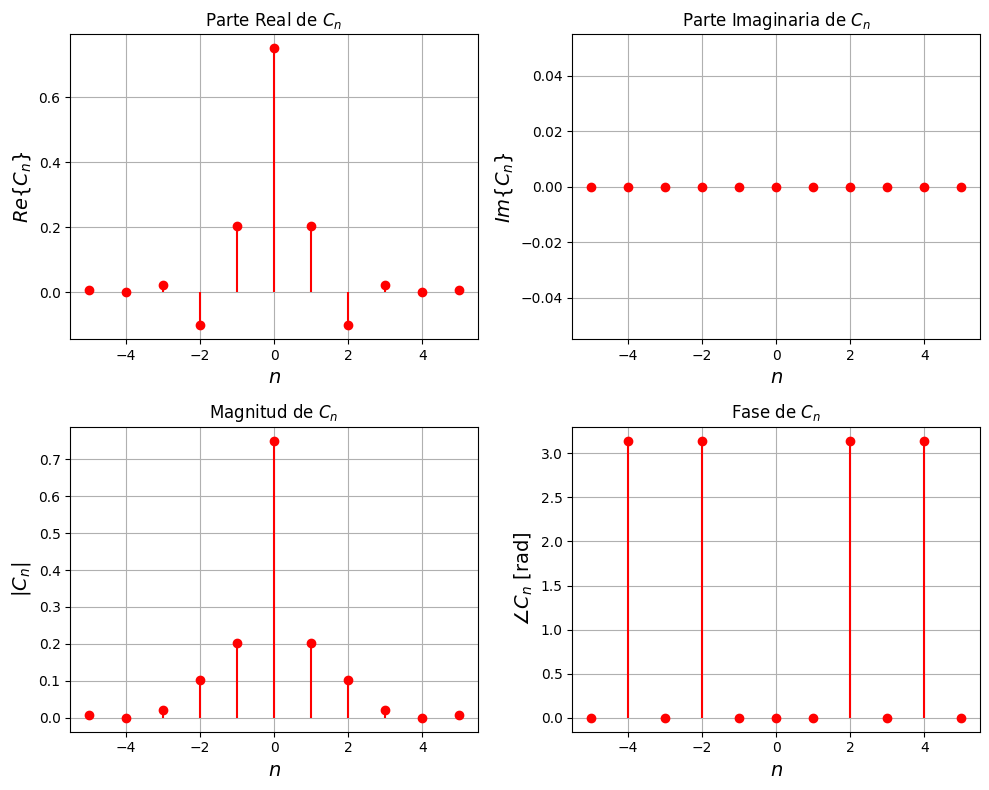

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Asumimos que 'nv' (vector de números de armónicos)
# y 'Cn' (coeficientes de Fourier) ya han sido calculados.
# Si no, asegúrate de ejecutar el código anterior que los define.

# Crear la figura y los subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8)) # Ajuste el tamaño para mejor visualización

# Gráfico de la parte real de Cn
axes[0, 0].stem(nv, np.real(Cn), linefmt='r-', markerfmt='ro', basefmt=' ')
axes[0, 0].set_xlabel(r'$n$', fontsize=14) # Usamos 'n' para el índice del armónico
axes[0, 0].set_ylabel(r'$Re\{C_n\}$', fontsize=14)
axes[0, 0].set_title('Parte Real de $C_n$')
axes[0, 0].grid(True)

# Gráfico de la parte imaginaria de Cn
axes[0, 1].stem(nv, np.imag(Cn), linefmt='r-', markerfmt='ro', basefmt=' ')
axes[0, 1].set_xlabel(r'$n$', fontsize=14) # Usamos 'n' para el índice del armónico
axes[0, 1].set_ylabel(r'$Im\{C_n\}$', fontsize=14)
axes[0, 1].set_title('Parte Imaginaria de $C_n$')
axes[0, 1].grid(True)

# Gráfico de la magnitud de Cn
axes[1, 0].stem(nv, np.abs(Cn), linefmt='r-', markerfmt='ro', basefmt=' ')
axes[1, 0].set_xlabel(r'$n$', fontsize=14) # Usamos 'n' para el índice del armónico
axes[1, 0].set_ylabel(r'$|C_n|$', fontsize=14)
axes[1, 0].set_title('Magnitud de $C_n$')
axes[1, 0].grid(True)

# Gráfico de la fase de Cn
# La fase puede ser indefinida donde la magnitud es cero. Podemos usar np.angle directamente.
axes[1, 1].stem(nv, np.angle(Cn), linefmt='r-', markerfmt='ro', basefmt=' ')
axes[1, 1].set_xlabel(r'$n$', fontsize=14) # Usamos 'n' para el índice del armónico
axes[1, 1].set_ylabel(r'$\angle C_n$ [rad]', fontsize=14) # Usamos el símbolo de ángulo
axes[1, 1].set_title('Fase de $C_n$')
axes[1, 1].grid(True)


# Ajustar el layout para evitar superposiciones
fig.tight_layout()

# Mostrar las gráficas
plt.show()

In [22]:
Px = 2/3 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=5, min=1), Output()), _dom_classes=('widget-int…

<function __main__.pltest(Na=1)>